In [10]:
%matplotlib inline

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.path import Path
from numpy import arange

from py_eddy_tracker import data
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.poly import create_vertice
import re
from datetime import datetime, timedelta

from matplotlib.animation import FuncAnimation
from numpy import arange, isnan, meshgrid, ones

from py_eddy_tracker import start_logger
from py_eddy_tracker.data import get_demo_path
from py_eddy_tracker.dataset.grid import GridCollection, _fit_circle_path
from py_eddy_tracker.observations.observation  import EddiesObservations
from py_eddy_tracker.gui import GUI_AXES
from py_eddy_tracker.generic import uniform_resample, coordinates_to_local
from py_eddy_tracker.poly import create_vertice, poly_area, visvalingam

from netCDF4 import Dataset
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.cm as cm

from typing import List, Tuple

In [3]:
grid_collection = GridCollection.from_netcdf_cube(
            "/home/ollie/ssunar/nn_interpolation_new/ssh_gridded_1961_001_01_new.nc",
            "LONGITUDE",
            "LATITUDE",
            "TIME",
            heigth="ssh")

We assume pixel position of grid is centered for /home/ollie/ssunar/nn_interpolation_new/ssh_gridded_1961_001_01_new.nc
We assume pixel position of grid is centered for /home/ollie/ssunar/nn_interpolation_new/ssh_gridded_1961_001_01_new.nc
We assume pixel position of grid is centered for /home/ollie/ssunar/nn_interpolation_new/ssh_gridded_1961_001_01_new.nc
We assume pixel position of grid is centered for /home/ollie/ssunar/nn_interpolation_new/ssh_gridded_1961_001_01_new.nc
We assume pixel position of grid is centered for /home/ollie/ssunar/nn_interpolation_new/ssh_gridded_1961_001_01_new.nc
We assume pixel position of grid is centered for /home/ollie/ssunar/nn_interpolation_new/ssh_gridded_1961_001_01_new.nc
We assume pixel position of grid is centered for /home/ollie/ssunar/nn_interpolation_new/ssh_gridded_1961_001_01_new.nc
We assume pixel position of grid is centered for /home/ollie/ssunar/nn_interpolation_new/ssh_gridded_1961_001_01_new.nc
We assume pixel position of grid is cent

In [8]:
grid_class = grid_collection.datasets[0][1]

In [9]:
grid_class.vars["ssh"]

masked_array(
  data=[[-0.7038369178771973, -0.697141706943512, -0.693639874458313,
         ..., --, --, --],
        [-0.7445776462554932, -0.7236122488975525, -0.7205229997634888,
         ..., --, --, --],
        [-0.7601337432861328, -0.7467331290245056, -0.7473640441894531,
         ..., --, --, --],
        ...,
        [-1.6232173442840576, -1.617802619934082, -1.6113624572753906,
         ..., --, --, --],
        [-1.6377304792404175, -1.631127953529358, -1.6258326768875122,
         ..., --, --, --],
        [-1.6477681398391724, -1.6418572664260864, -1.6364002227783203,
         ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=9.96920996838

In [16]:
unfiltered_ssh = np.flipud(grid_class.vars["ssh"].T).copy()

In [17]:
grid_class.bessel_high_filter("ssh", 500)

In [19]:
filter_using_og = np.flipud(grid_class.vars["ssh"].T)

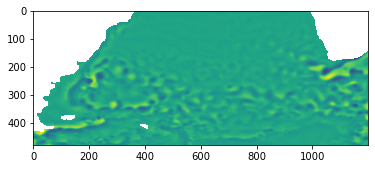

In [20]:
plt.imshow(filter_using_og)